Stock market prices using Social media (X) and yFinance

The following researches analysizes stock market using machine learning, sentiment analyis and prediction using data from X and Yfinance. prediction future stock prices through a Long Short Term Memory (LSTM) method!

MAin Focus Areas

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

# 1. What was the change in price of the stock overtime?

Fetch data from yfinance and do analytics

In [ ]:
## install yfinance to fech data from yfinance stock 
!pip install -q yfinance

In [ ]:
## Importation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
import os
from datetime import datetime
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Save Results to plot directory
plot_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "plots"))
os.makedirs(plot_dir, exist_ok=True)  

In [95]:
# Download required NLTK data
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jeffm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# 1. SENTIMENT ANALYSIS OF SCRAPED TWEETS
def analyze_tweets_sentiment():
    # Load scraped tweets
    tweet_df = pd.read_csv('stock_tweets.csv')
    
    # Text preprocessing
    def preprocess_text(text):
        text = str(text).lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'\@\w+|\#', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        return text
    
    tweet_df['cleaned_text'] = tweet_df['text'].apply(preprocess_text)
    
    # Sentiment analysis with TextBlob
    def get_sentiment(text):
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    
    tweet_df['sentiment'] = tweet_df['cleaned_text'].apply(get_sentiment)
    
    # Categorize sentiment
    def categorize_sentiment(score):
        if score > 0.1:
            return 'Positive'
        elif score < -0.1:
            return 'Negative'
        else:
            return 'Neutral'
    
    tweet_df['sentiment_category'] = tweet_df['sentiment'].apply(categorize_sentiment)
    
    # VADER sentiment analysis (better for social media)
    sid = SentimentIntensityAnalyzer()
    tweet_df['vader_sentiment'] = tweet_df['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
    
    # Extract date from tweet links
    tweet_df['date'] = pd.to_datetime(tweet_df['link'].str.extract(r'(\d{4}/\d{2}/\d{2})')[0])
    
    return tweet_df

# 2. VISUALIZE SENTIMENT RESULTS
def visualize_sentiment(tweet_df):
    # Sentiment distribution plot
    plt.figure(figsize=(12,6))
    sns.countplot(x='sentiment_category', data=tweet_df, hue='company')
    plt.title('Sentiment Distribution by Company')
    plt.savefig(os.path.join(plot_dir, 'sentiment_distribution.png'))
    plt.show()
    
    
    # Sentiment vs Engagement
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    sns.scatterplot(x='vader_sentiment', y='likes', data=tweet_df, ax=axes[0,0])
    sns.scatterplot(x='vader_sentiment', y='retweets', data=tweet_df, ax=axes[0,1])
    sns.scatterplot(x='vader_sentiment', y='comments', data=tweet_df, ax=axes[1,0])
    plt.suptitle('Sentiment vs Engagement Metrics')
    plt.savefig(os.path.join(plot_dir, 'sentiment_engagement.png'))
    plt.show()


Analyzing tweet sentiment...


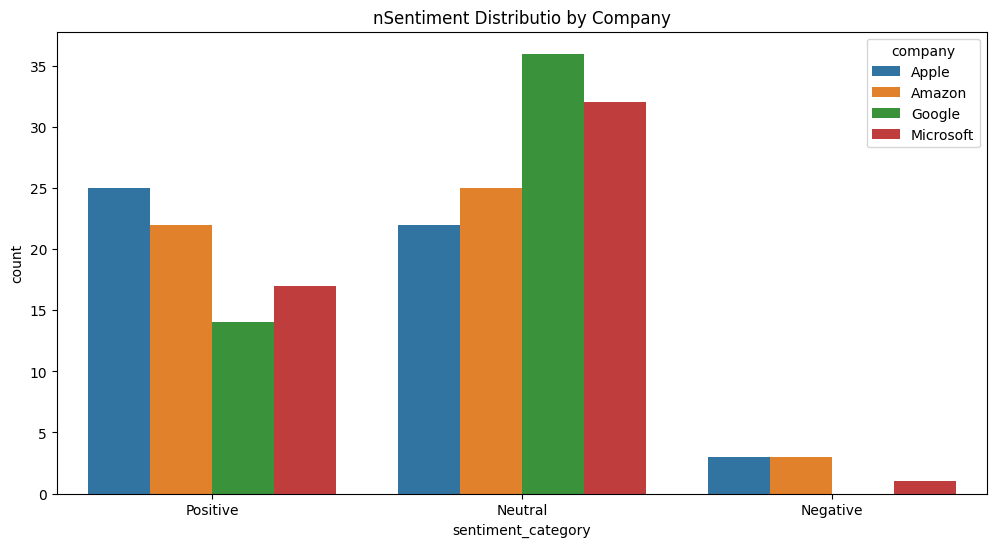

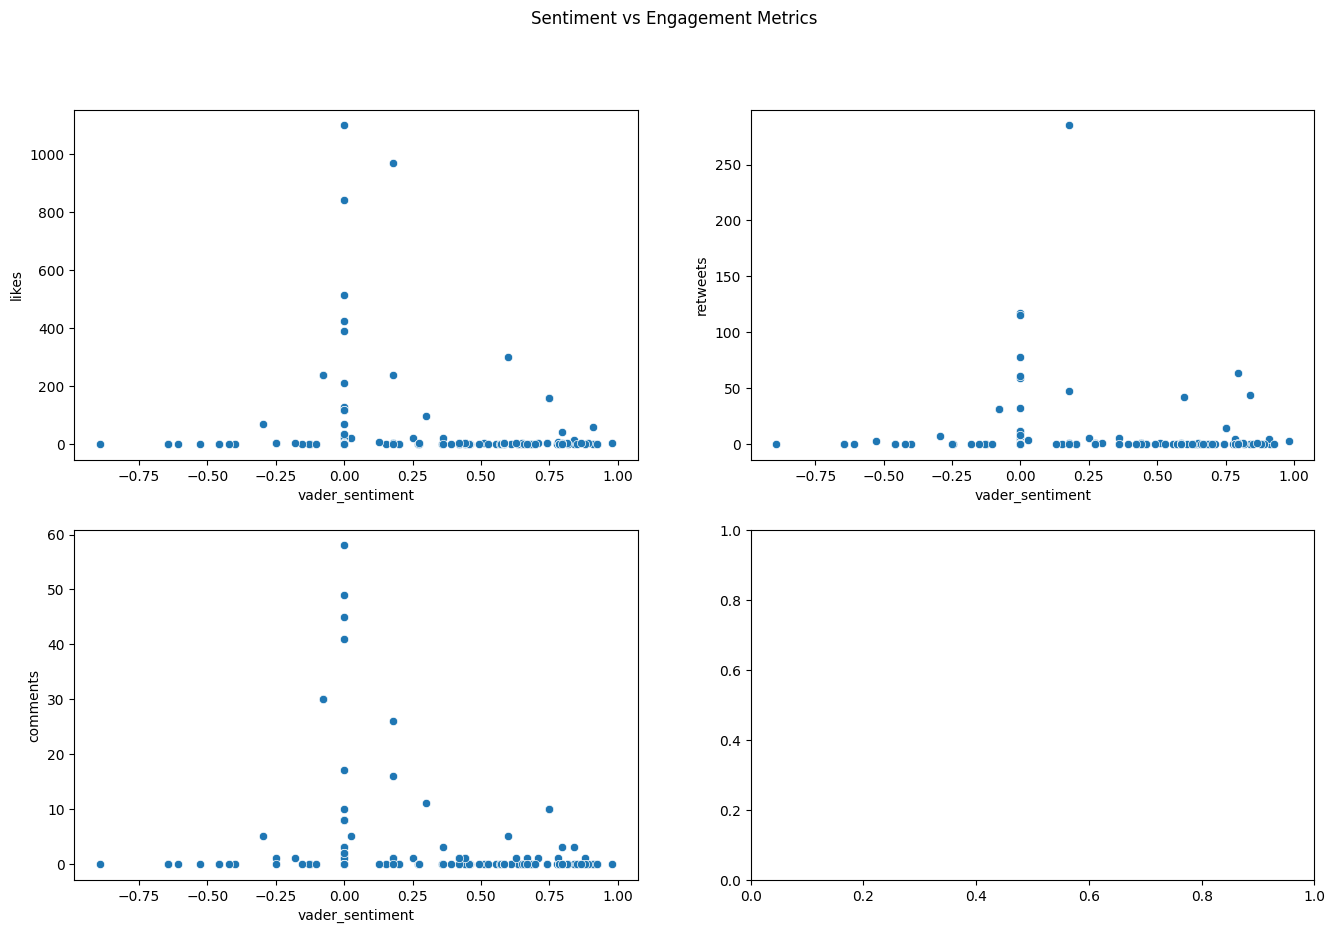

In [ ]:
if __name__ == "__main__":
    # Analyze tweet sentiment
    print("Analyzing tweet sentiment...")
    tweet_data = analyze_tweets_sentiment()
    
    # Check if we got valid data
    if not tweet_data.empty:
        visualize_sentiment(tweet_data)
    else:
        print("No valid tweet data available for visualization")


In [98]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end, multi_level_index = False)

# Add company name to each dataframe
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# print(company_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Descriptive Statistics about the Data

In [ ]:
# Summary Stats for apple 
AAPL.describe()

# General Info
AAPL.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-04-01 to 2025-03-28
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Open          250 non-null    float64
 4   Volume        250 non-null    int64  
 5   company_name  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

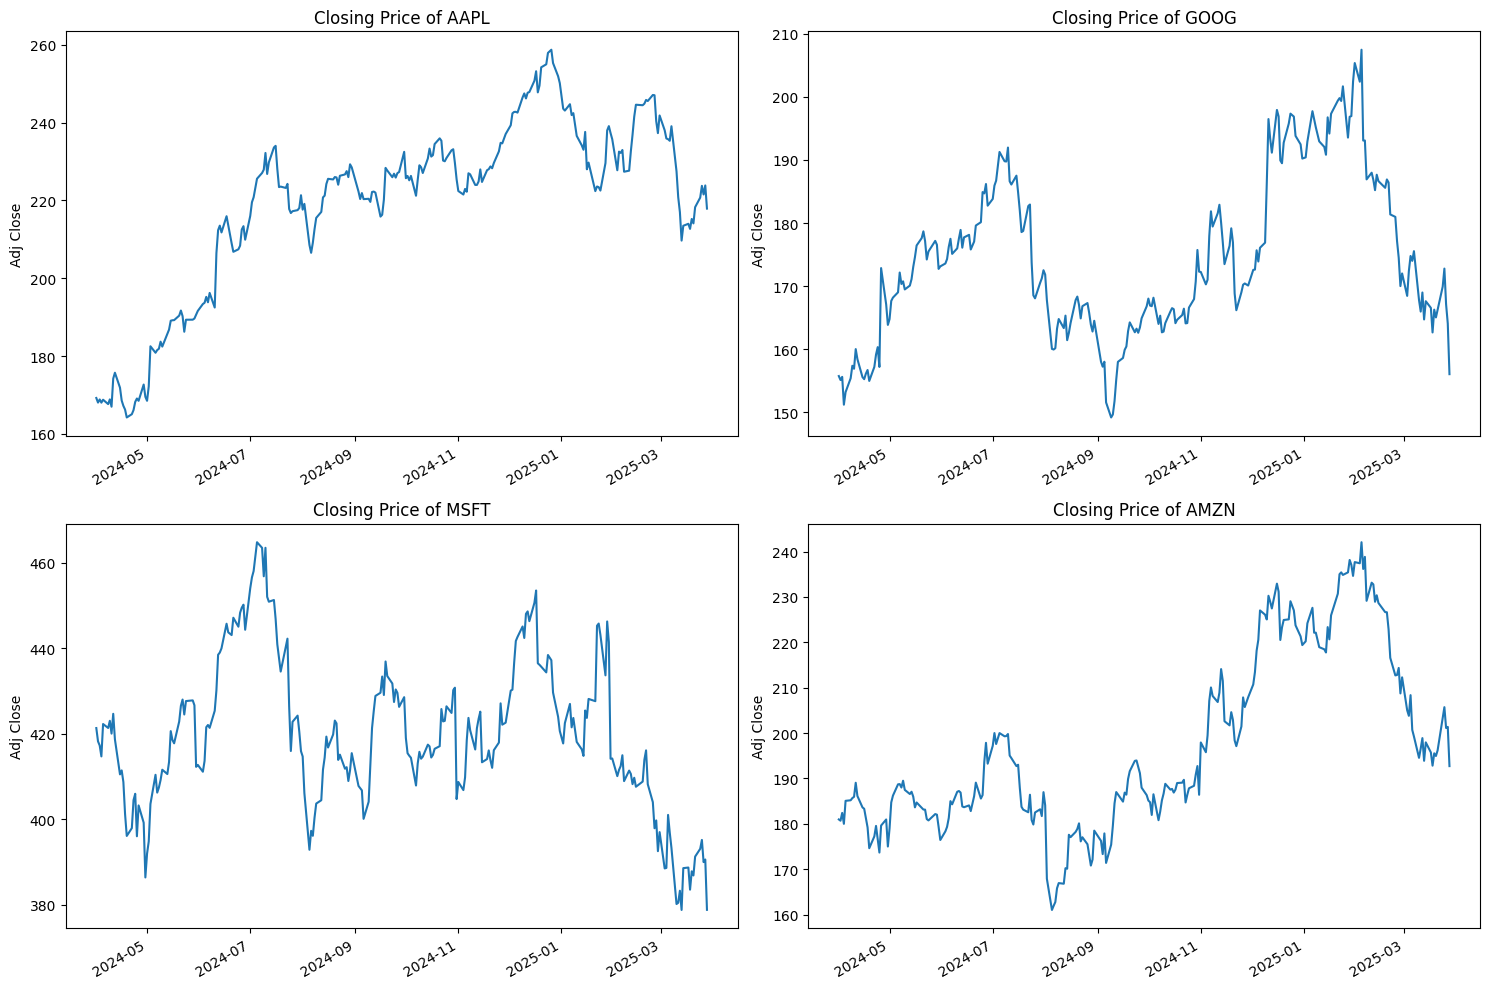

In [100]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)  # Adjust margins

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company.iloc[:, 0].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'Closing_Prices.png'), bbox_inches='tight', dpi=300)  # Ensure full image capture
plt.show()


## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day.

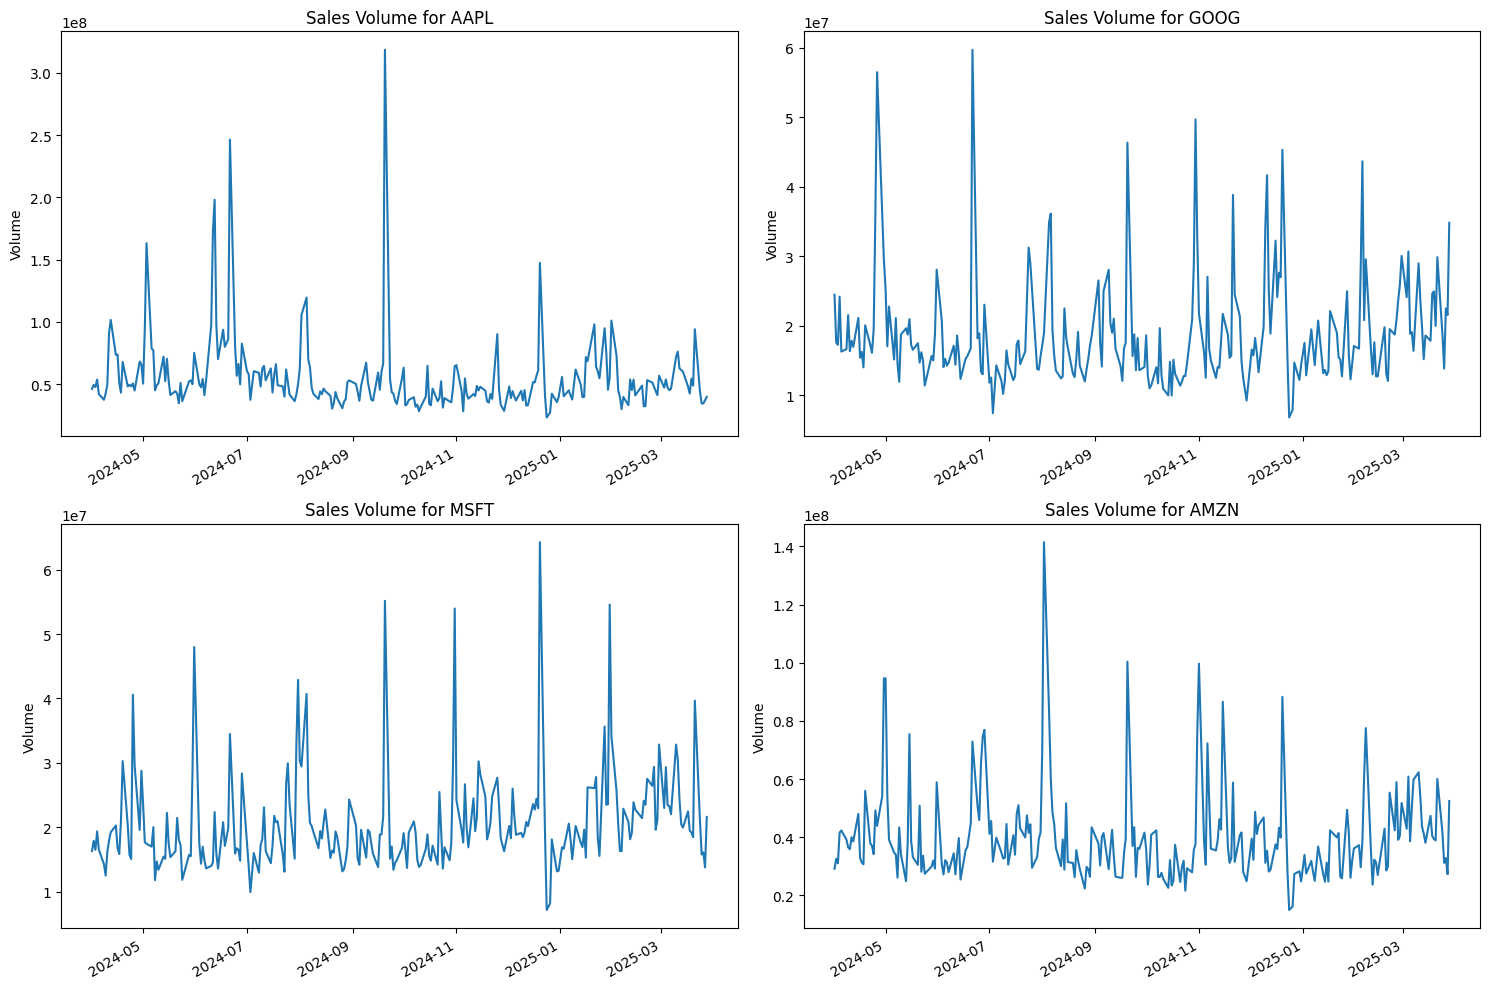

In [101]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)  # Adjust margins

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'Sales_Volume.png'), bbox_inches='tight', dpi=300)  # Ensure full image capture
plt.show()


#2 .What was the daily return of the stock on average?
Analysize risk of stock by analyzing changes of stock based on daily returns

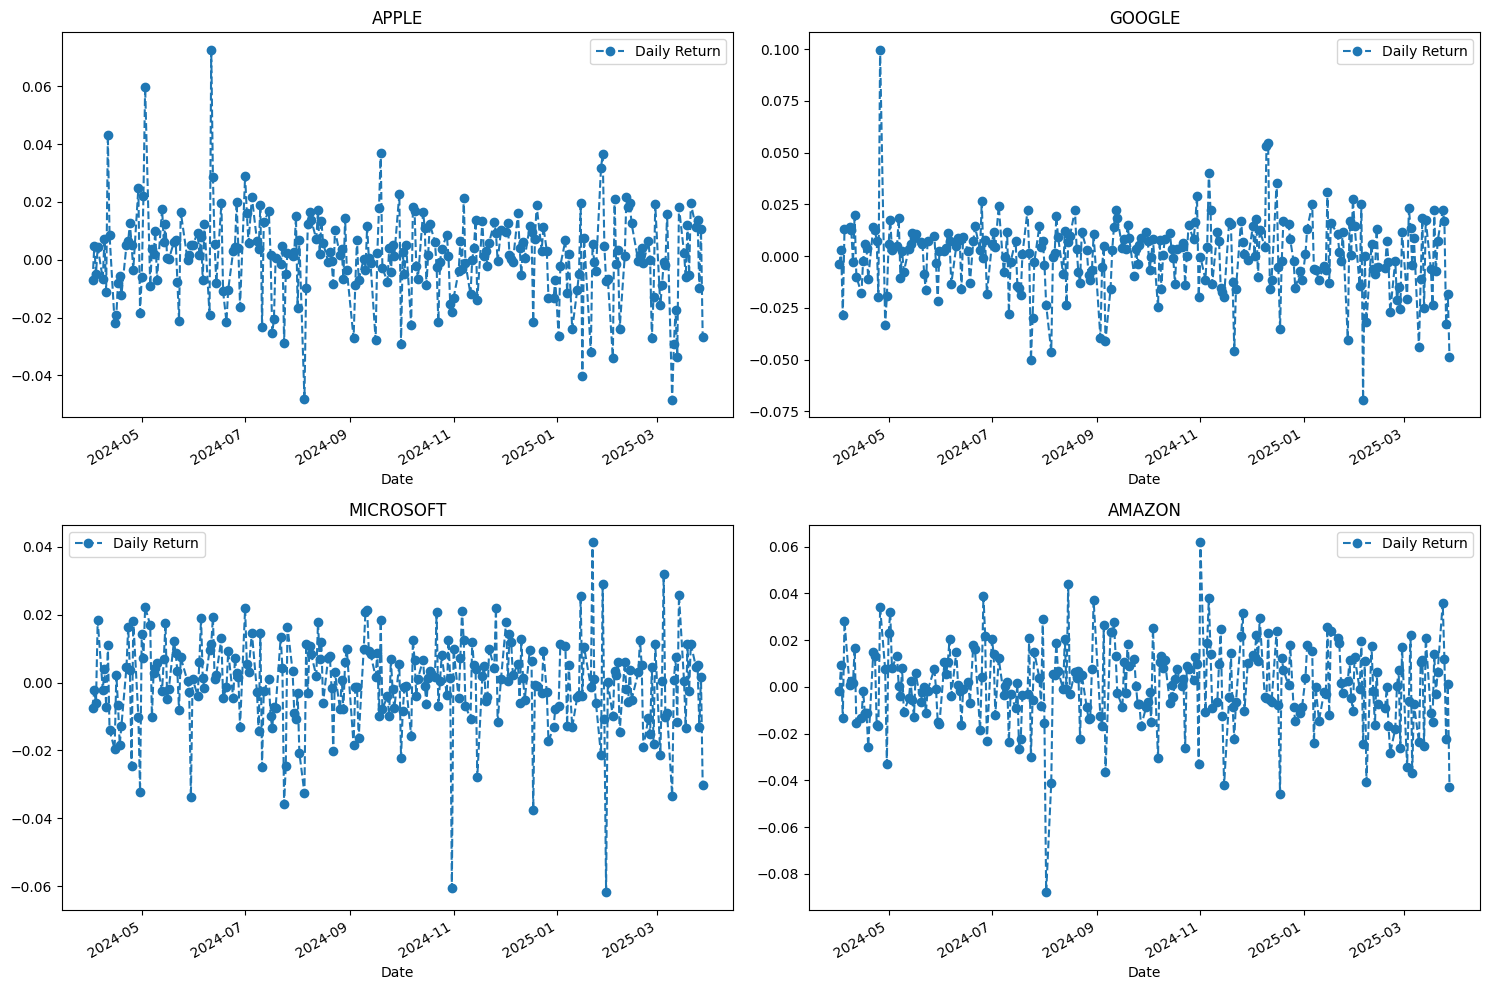

In [102]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

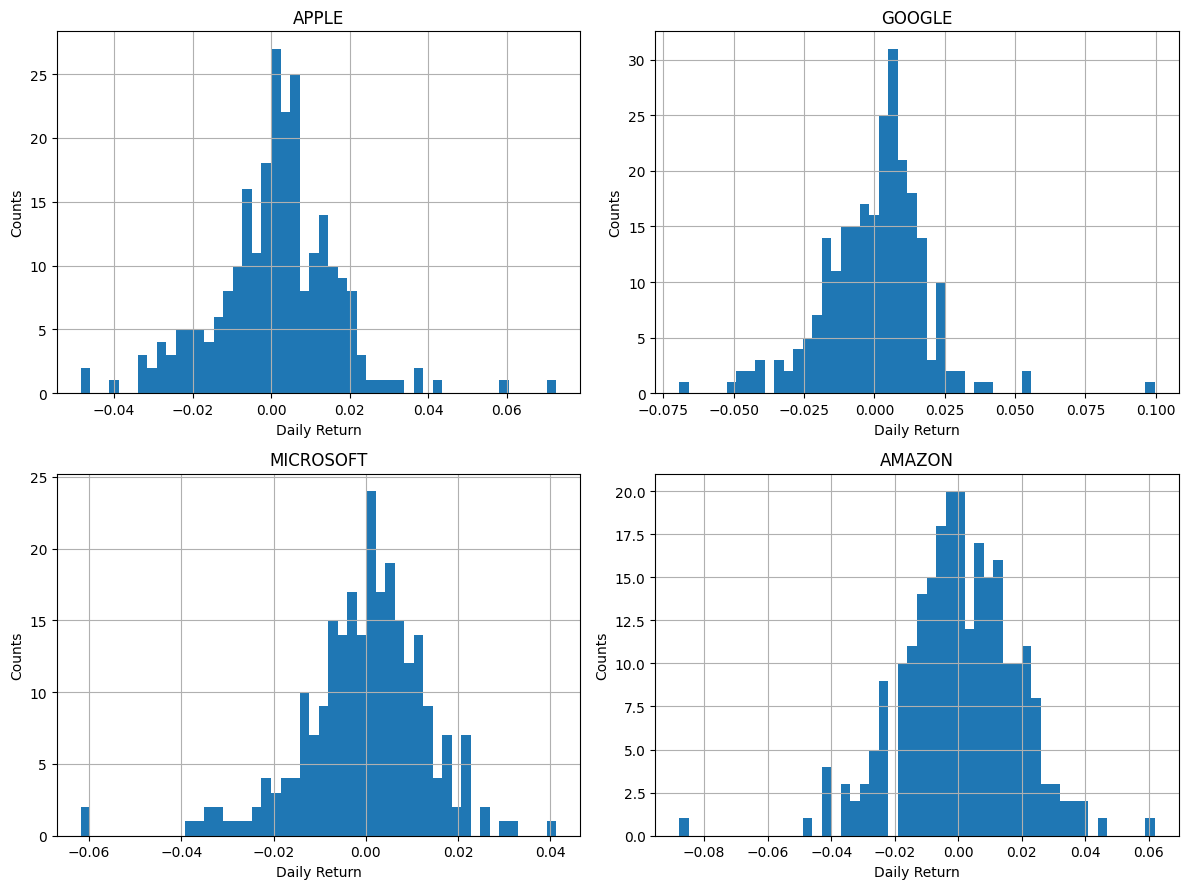

In [103]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    plt.savefig(os.path.join(plot_dir, 'Daily Returns'))
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].


In [104]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end, multi_level_index = False)['Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-04-01,NaN,NaN,NaN,NaN
2024-04-02,-0.006999,-0.001547,-0.004025,-0.007372
2024-04-03,0.004797,0.009519,0.003208,-0.002349
2024-04-04,-0.004892,-0.013212,-0.028330,-0.006112
2024-04-05,0.004502,0.028167,0.013163,0.018283


## Compare daily percentage return of two stocks to check how correlated

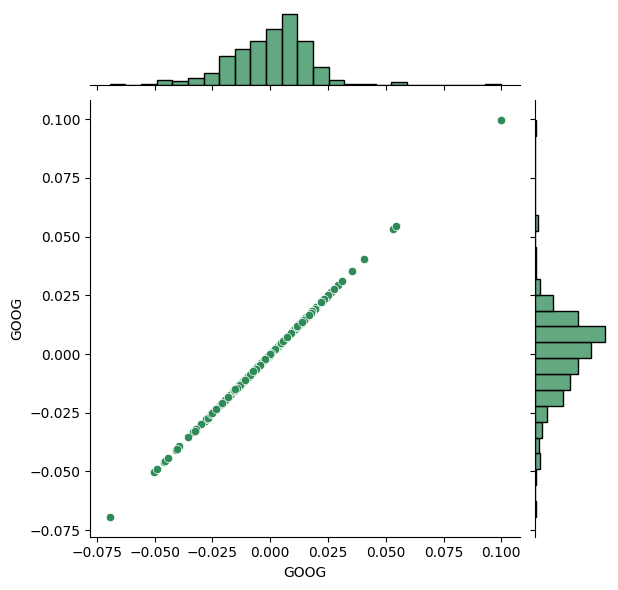

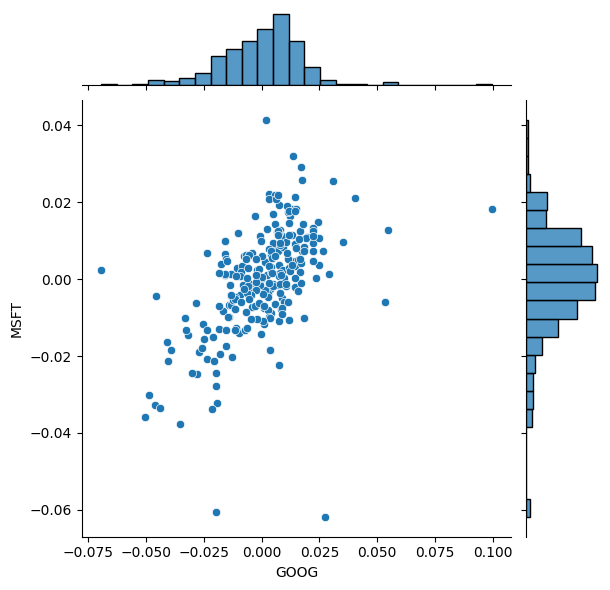

In [105]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

##

The above plots if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

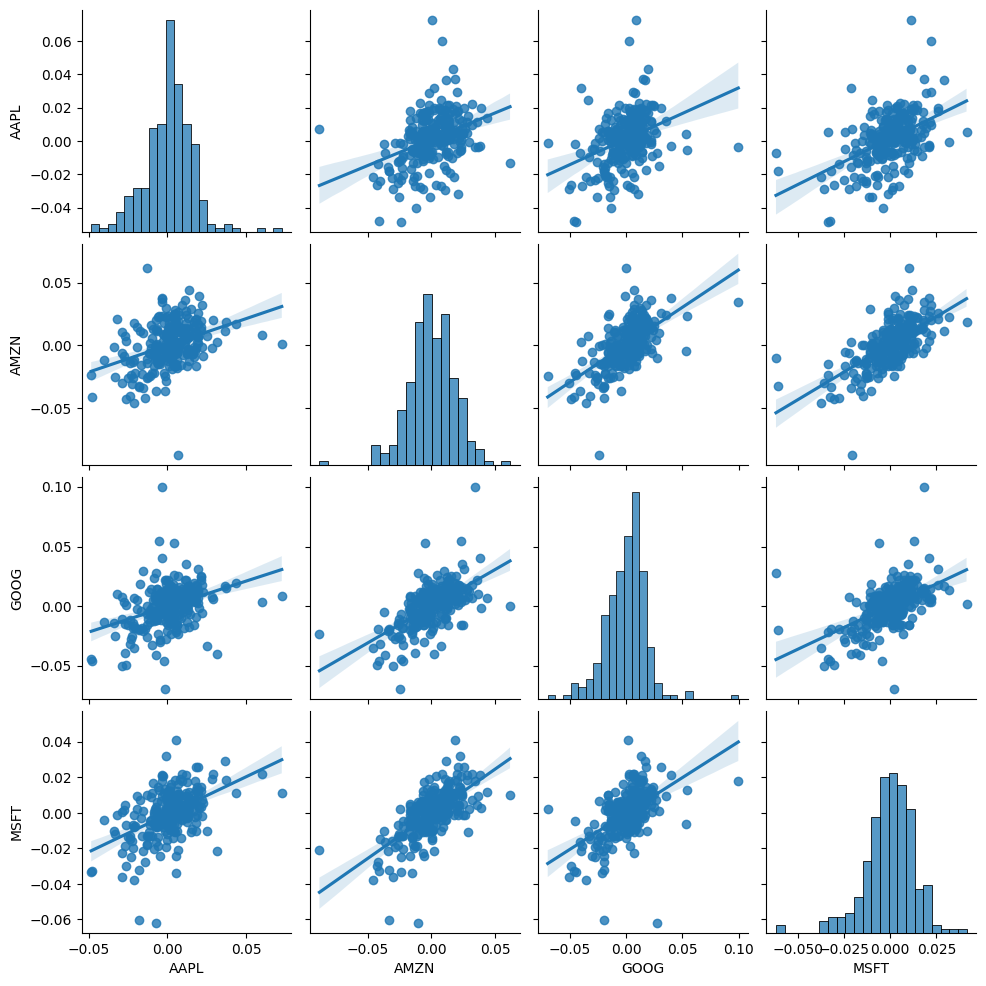

In [106]:
pairplot = sns.pairplot(tech_rets, kind='reg')

# Save the figure
pairplot.fig.savefig(os.path.join(plot_dir, 'pairplot.png'), bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

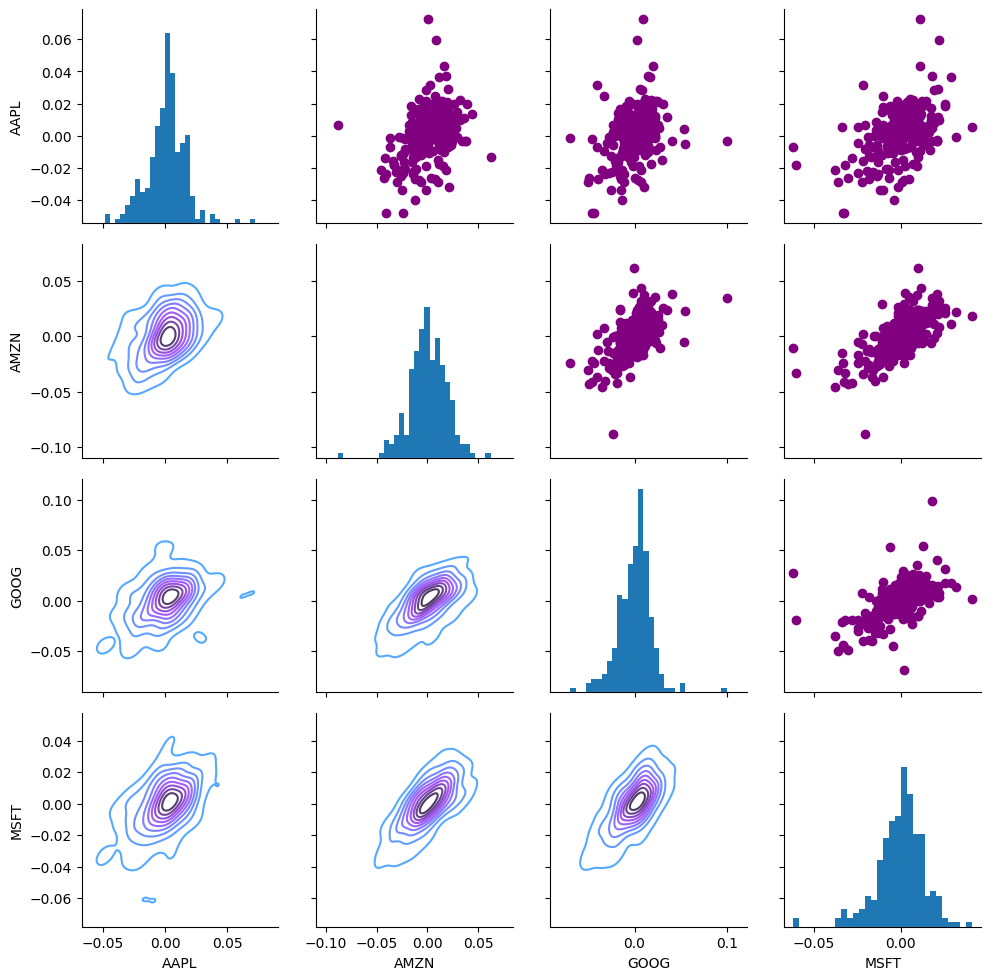

In [107]:
# Set up the PairGrid
return_fig = sns.PairGrid(tech_rets.dropna())

# Define different plots for different sections of the PairGrid
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

# Save the figure
return_fig.savefig(os.path.join(plot_dir, "returns_pairgrid.png"), bbox_inches="tight", dpi=300)

# Show the plot (optional)
plt.show()

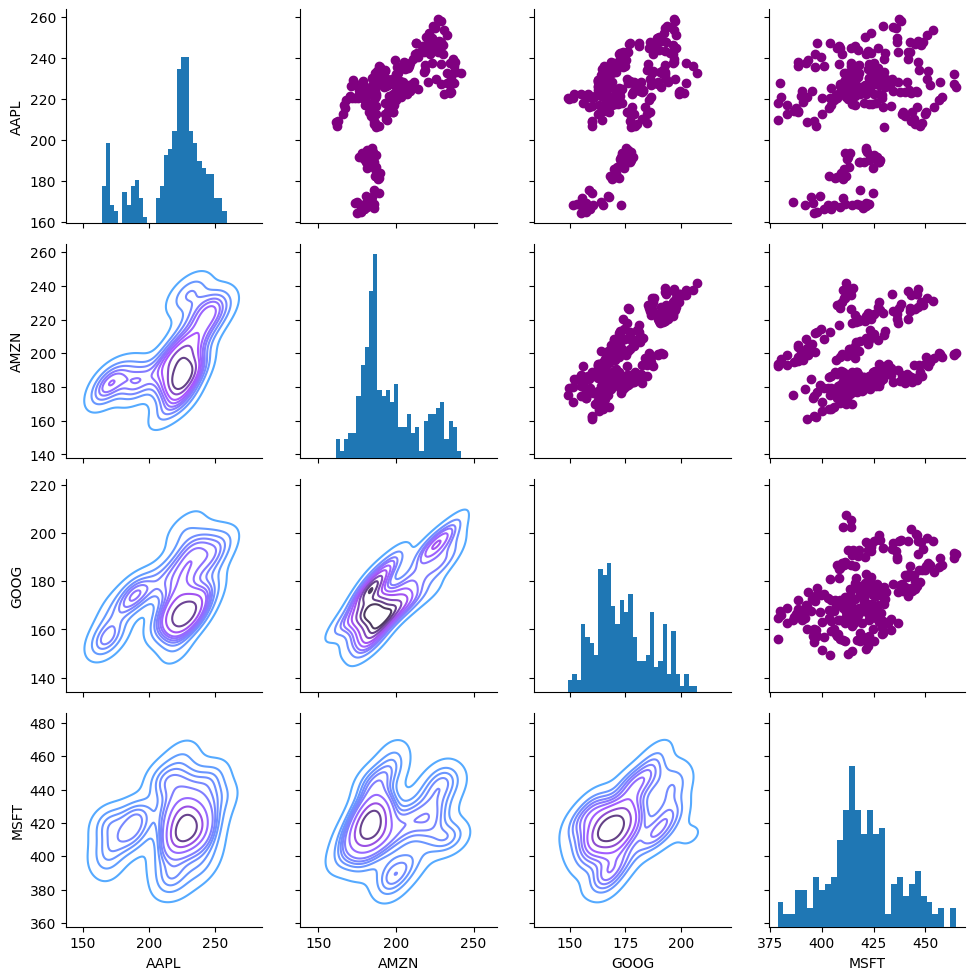

In [108]:
# Set up the PairGrid
returns_fig = sns.PairGrid(closing_df)

# Define different plots for different sections of the PairGrid
returns_fig.map_upper(plt.scatter, color="purple")
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")
returns_fig.map_diag(plt.hist, bins=30)

# Save the figure
returns_fig.savefig(os.path.join(plot_dir, "closing_prices_pairgrid.png"), bbox_inches="tight", dpi=300)

# Show the plot (optional)
plt.show()

## Perform correlation plot to get actual numerical values for the correlation between the stocks' daily return values.

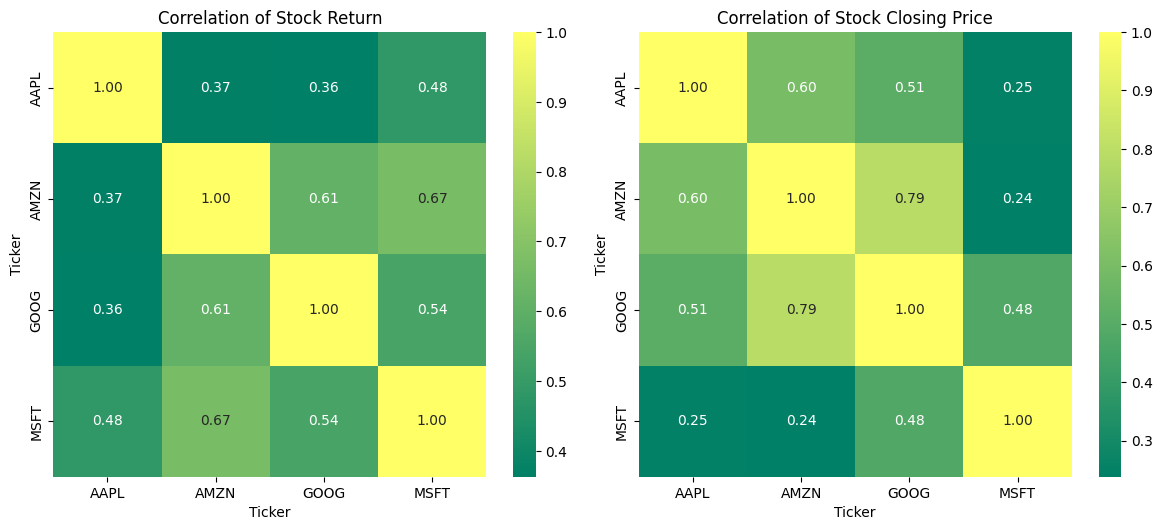

In [109]:
# Create figure
plt.figure(figsize=(12, 10))

# First subplot: Correlation of stock return
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer', fmt=".2f")
plt.title('Correlation of Stock Return')

# Second subplot: Correlation of stock closing price
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer', fmt=".2f")
plt.title('Correlation of Stock Closing Price')

# Adjust layout and save
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'Stock_Correlation.png'), bbox_inches='tight', dpi=300)

plt.show()

## 5. How much value do we put at risk by investing in a particular stock?
## To do so we use the information on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

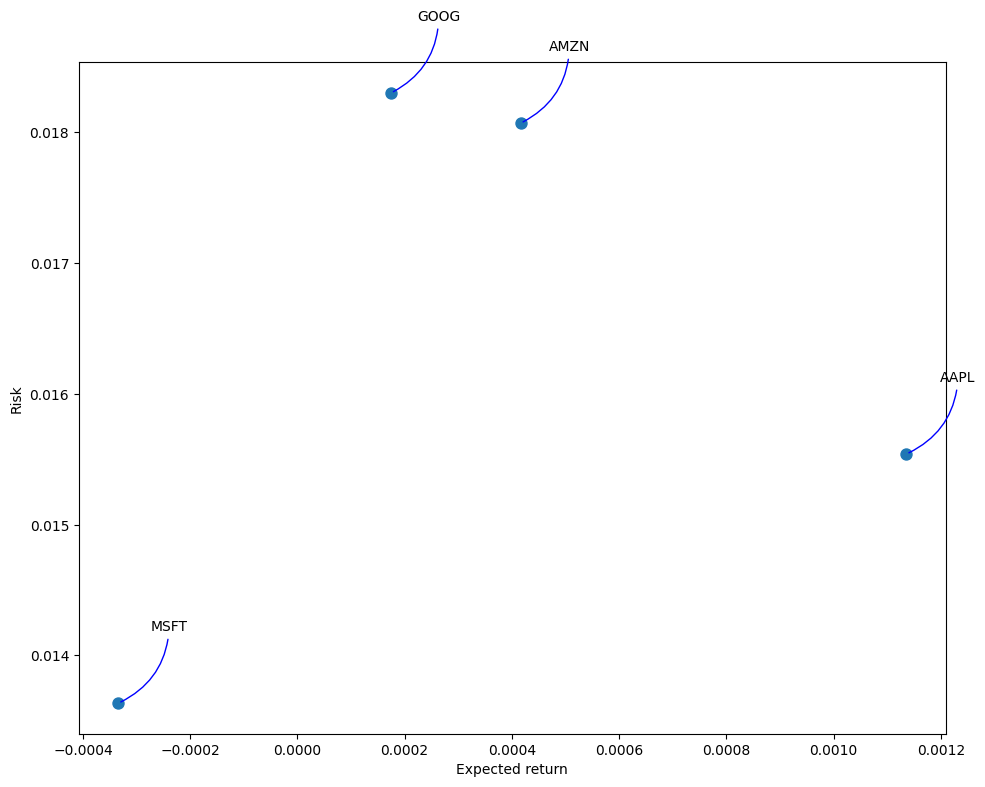

In [110]:
# Drop NaN values
rets = tech_rets.dropna()

# Define marker size
area = np.pi * 20

# Create figure
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)

# Labels
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Annotate each point
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', 
                 ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Fix cropping issue
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'Risk_vs_Expected_Return.png'), bbox_inches='tight', dpi=300)

plt.show()

## 6. Predicting the closing price stock price of APPLE inc:

In [111]:
# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=datetime.now(), multi_level_index = False)
df

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2012-01-03,12.375389,12.413608,12.308281,12.320319,302220800
2012-01-04,12.441895,12.479211,12.316706,12.338373,260022000
2012-01-05,12.580028,12.595676,12.418725,12.487340,271269600
2012-01-06,12.711532,12.722064,12.615834,12.632386,318292800
2012-01-09,12.691374,12.872537,12.679938,12.804827,394024400
...,...,...,...,...,...
2025-03-24,220.729996,221.479996,218.580002,221.000000,44299500
2025-03-25,223.750000,224.100006,220.080002,220.770004,34493600
2025-03-26,221.529999,225.020004,220.470001,223.509995,34466100


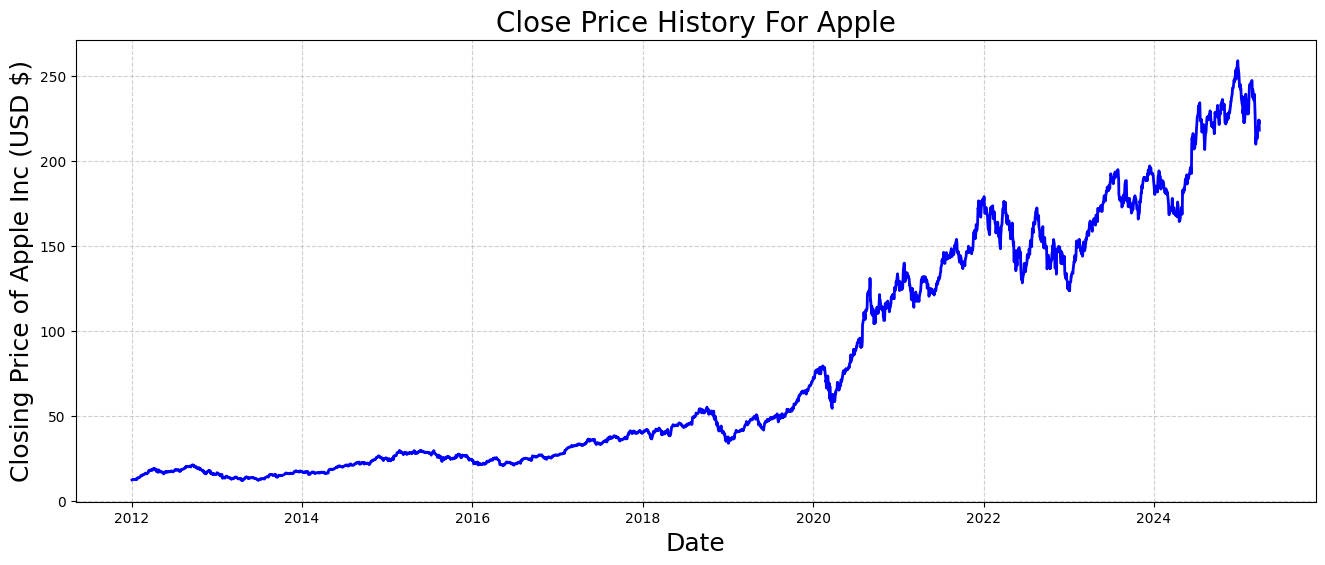

In [112]:
# Create figure
plt.figure(figsize=(16, 6))
plt.title('Close Price History For Apple', fontsize=20)
plt.plot(df['Close'], color='blue', linewidth=2)

# Labels
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price of Apple Inc (USD $)', fontsize=18)

# Grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Save the figure
plt.savefig(os.path.join(plot_dir, 'Close_Price_History.png'), bbox_inches='tight', dpi=300)

plt.show()


In [113]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .1 ))

training_data_len



scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.00182111],
       [0.00209057],
       [0.00265024],
       ...,
       [0.84925421],
       [0.8586542 ],
       [0.8345465 ]])

In [114]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00182111, 0.00209057, 0.00265024, 0.00318306, 0.00310138,
       0.0032855 , 0.00320135, 0.00305992, 0.00286728, 0.00346352,
       0.00400123, 0.0038354 , 0.00292702, 0.00379394, 0.00294044,
       0.00614112, 0.00589358, 0.00621671, 0.00691537, 0.00733847,
       0.0073031 , 0.00717264, 0.00772864, 0.00825173, 0.00884431,
       0.00980147, 0.01181208, 0.01184258, 0.01296189, 0.01379833,
       0.01236081, 0.01291433, 0.01290336, 0.01445556, 0.01423486,
       0.01464332, 0.01537736, 0.0157858 , 0.01696246, 0.01781959,
       0.01806713, 0.01815366, 0.01668808, 0.01633449, 0.01638694,
       0.01776472, 0.01815251, 0.01898529, 0.02094834, 0.02356741,
       0.02307725, 0.02307843, 0.02497205, 0.02556462, 0.02514276,
       0.02475746, 0.02435631, 0.025689  , 0.02660347, 0.02698632])]
[0.02604014046381796]

[array([0.00182111, 0.00209057, 0.00265024, 0.00318306, 0.00310138,
       0.0032855 , 0.00320135, 0.00305992, 0.00286728, 0.00346352,
       0.00400123, 0.0038354 , 0.00

In [115]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

273/273 [==============================] - 11s 26ms/step - loss: 5.9627e-05


In [116]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


# Split data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

94/94 [==============================] - 4s 29ms/step


C:\Users\jeffm\AppData\Local\Temp\ipykernel_3360\3195807580.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


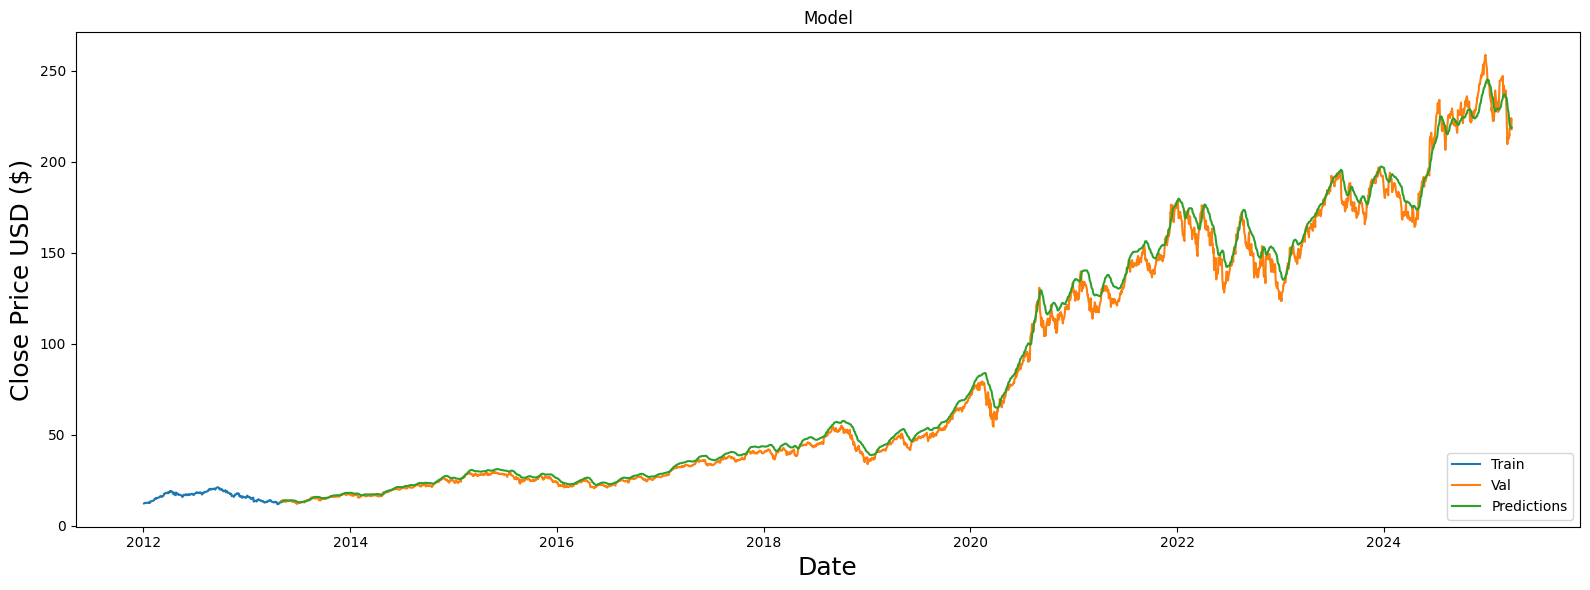

In [117]:
# Create figure
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot data
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

# Legend
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

# Fix cropping issue
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'Model_Predictions.png'), bbox_inches='tight', dpi=300)

plt.show()

In [118]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2013-05-02,13.605197,13.009205
2013-05-03,13.741391,13.118980
2013-05-06,14.069069,13.243875
2013-05-07,14.006461,13.390642
2013-05-08,14.164647,13.540259
...,...,...
2025-03-24,220.729996,219.165207
2025-03-25,223.750000,218.590164
2025-03-26,221.529999,218.443069
